# DATA 200 Final Project (Peng Gu, Xi Chen, Kewei Sui)

In [2]:
# import all packages
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

In [3]:
# import all datasets
# df_college = pd.read_csv('dataset/college.csv')
df_player = pd.read_csv('dataset/2012-18_playerBoxScore.csv')
df_allnbatm = pd.read_csv('dataset/all_nba_team_2012_2017.csv',encoding='latin-1')
df_player['gmDate'] = pd.to_datetime(df_player['gmDate'], format='%Y-%m-%d')
# df_player.head()
df_allnbatm.head(10)

,name,year,position,team,sub_team
0,LeBron James,2012,F,Miami Heat,1
1,Kevin Durant,2012,F,Oklahoma City Thunder,1
2,Tim Duncan,2012,C,San Antonio Spurs,1
3,Kobe Bryant,2012,G,Los AngelesÊLakers,1
4,Chris Paul,2012,G,L.A. Clippers,1
5,Carmelo Anthony,2012,F,New York Knicks,2
6,Blake Griffin,2012,F,L.A. Clippers,2
7,Marc Gasol,2012,C,Memphis Grizzlies,2
8,Tony Parker,2012,G,San Antonio Spurs,2
9,Russell Westbrook,2012,G,Oklahoma City Thunder,2


In [4]:
start_dates = ['2012-10-30', '2013-10-29', '2014-10-28', '2015-10-27','2016-10-25','2017-10-17','2018-10-16']
for i in range(len(start_dates)):
    start_dates[i] = datetime.datetime.strptime(start_dates[i],'%Y-%m-%d')
# print(start_dates)
def setSeasons(gm_date):
    for i in range(len(start_dates) - 1):
        if gm_date >= start_dates[i] and gm_date < start_dates[i + 1]:
            return start_dates[i].year
df_player["seasYear"] = df_player['gmDate'].apply(lambda x:setSeasons(x))
df_player.tail(10)

,gmDate,gmTime,seasTyp,playLNm,playFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,...,playORB,playDRB,playTRB,opptAbbr,opptConf,opptDiv,opptLoc,opptRslt,opptDayOff,seasYear
155703,2018-04-11,10:30,Regular,Onuaku,Chinanu,HOU,West,Southwest,Away,Loss,...,1,3,4,SAC,West,Pacific,Home,Win,2,2017
155704,2018-04-11,10:30,Regular,Bogdanovic,Bogdan,SAC,West,Pacific,Home,Win,...,0,5,5,HOU,West,Southwest,Away,Loss,1,2017
155705,2018-04-11,10:30,Regular,Jackson,Justin,SAC,West,Pacific,Home,Win,...,0,4,4,HOU,West,Southwest,Away,Loss,1,2017
155706,2018-04-11,10:30,Regular,Cauley-Stein,Willie,SAC,West,Pacific,Home,Win,...,1,10,11,HOU,West,Southwest,Away,Loss,1,2017
155707,2018-04-11,10:30,Regular,Fox,De'Aaron,SAC,West,Pacific,Home,Win,...,1,7,8,HOU,West,Southwest,Away,Loss,1,2017
155708,2018-04-11,10:30,Regular,Sampson,JaKarr,SAC,West,Pacific,Home,Win,...,0,4,4,HOU,West,Southwest,Away,Loss,1,2017
155709,2018-04-11,10:30,Regular,Hield,Chavano,SAC,West,Pacific,Home,Win,...,2,3,5,HOU,West,Southwest,Away,Loss,1,2017
155710,2018-04-11,10:30,Regular,Hayes,Nigel,SAC,West,Pacific,Home,Win,...,1,3,4,HOU,West,Southwest,Away,Loss,1,2017
155711,2018-04-11,10:30,Regular,Carter,Vincent,SAC,West,Pacific,Home,Win,...,0,3,3,HOU,West,Southwest,Away,Loss,1,2017
155712,2018-04-11,10:30,Regular,Cooley,Jack,SAC,West,Pacific,Home,Win,...,1,3,4,HOU,West,Southwest,Away,Loss,1,2017


In [5]:
df_player = df_player[df_player.seasTyp != 'Pre']
df_player['playFIC40'] = ((df_player['playPTS'] + df_player['playORB'] + 0.75 * df_player['playDRB'] + df_player['playAST'] + df_player['playSTL'] + df_player['playBLK']
- 0.75 * df_player['playFGA'] - 0.375 * df_player['playFTA'] - df_player['playTO'] - 0.5 * df_player['playPF']) * 40 * 5) / df_player['playMin']
df_player.head(10)

,gmDate,gmTime,seasTyp,playLNm,playFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,...,playDRB,playTRB,opptAbbr,opptConf,opptDiv,opptLoc,opptRslt,opptDayOff,seasYear,playFIC40
0,2012-10-30,19:00,Regular,Price,A.J.,WAS,East,Southeast,Away,Loss,...,1,2,CLE,East,Central,Home,Win,0,2012,21.551724
1,2012-10-30,19:00,Regular,Ariza,Trevor,WAS,East,Southeast,Away,Loss,...,2,3,CLE,East,Central,Home,Win,0,2012,110.000000
2,2012-10-30,19:00,Regular,Okafor,Emeka,WAS,East,Southeast,Away,Loss,...,2,7,CLE,East,Central,Home,Win,0,2012,80.000000
3,2012-10-30,19:00,Regular,Beal,Bradley,WAS,East,Southeast,Away,Loss,...,3,3,CLE,East,Central,Home,Win,0,2012,45.454545
4,2012-10-30,19:00,Regular,Booker,Trevor,WAS,East,Southeast,Away,Loss,...,0,1,CLE,East,Central,Home,Win,0,2012,-55.882353
5,2012-10-30,19:00,Regular,Crawford,Jordan,WAS,East,Southeast,Away,Loss,...,2,3,CLE,East,Central,Home,Win,0,2012,53.448276
6,2012-10-30,19:00,Regular,Webster,Martell,WAS,East,Southeast,Away,Loss,...,3,3,CLE,East,Central,Home,Win,0,2012,80.434783
7,2012-10-30,19:00,Regular,Vesely,Jan,WAS,East,Southeast,Away,Loss,...,1,4,CLE,East,Central,Home,Win,0,2012,54.761905
8,2012-10-30,19:00,Regular,Singleton,Chris,WAS,East,Southeast,Away,Loss,...,2,4,CLE,East,Central,Home,Win,0,2012,50.000000
9,2012-10-30,19:00,Regular,Barron,Earl,WAS,East,Southeast,Away,Loss,...,4,8,CLE,East,Central,Home,Win,0,2012,139.062500


In [6]:
# def fillEmptyOffName(curr_row):
    # if pd.isna(curr_row['offLNm3']):
    #     curr_row['offLNm3'] = curr_row['offLNm2']
    # if pd.isna(curr_row['offFNm3']):
    #     curr_row['offFNm3'] = curr_row['offFNm2']
df_player['offLNm3'] = df_player['offLNm3'].fillna(df_player['offLNm2'])
df_player['offFNm3'] = df_player['offFNm3'].fillna(df_player['offFNm2'])

# df_player = df_player.apply(lambda x : fillEmptyOffName(x), axis=1)
df_player = df_player.drop(columns=['teamDiv', 'teamDayOff', 'offLNm1', 'offFNm1', 'offLNm2', 'offFNm2', \
      'offLNm3', 'offFNm3', 'opptDiv', 'opptDayOff'])
df_player["playPos"] = df_player["playPos"] .replace({'PG':'G', 'SG':'G', 'SF':'F', 'PF':'F'})
df_player.head(10)

,gmDate,gmTime,seasTyp,playLNm,playFNm,teamAbbr,teamConf,teamLoc,teamRslt,playDispNm,...,playFT%,playORB,playDRB,playTRB,opptAbbr,opptConf,opptLoc,opptRslt,seasYear,playFIC40
0,2012-10-30,19:00,Regular,Price,A.J.,WAS,East,Away,Loss,A.J. Price,...,1.00,1,1,2,CLE,East,Home,Win,2012,21.551724
1,2012-10-30,19:00,Regular,Ariza,Trevor,WAS,East,Away,Loss,Trevor Ariza,...,0.50,1,2,3,CLE,East,Home,Win,2012,110.000000
2,2012-10-30,19:00,Regular,Okafor,Emeka,WAS,East,Away,Loss,Emeka Okafor,...,0.50,5,2,7,CLE,East,Home,Win,2012,80.000000
3,2012-10-30,19:00,Regular,Beal,Bradley,WAS,East,Away,Loss,Bradley Beal,...,1.00,0,3,3,CLE,East,Home,Win,2012,45.454545
4,2012-10-30,19:00,Regular,Booker,Trevor,WAS,East,Away,Loss,Trevor Booker,...,0.00,1,0,1,CLE,East,Home,Win,2012,-55.882353
5,2012-10-30,19:00,Regular,Crawford,Jordan,WAS,East,Away,Loss,Jordan Crawford,...,0.75,1,2,3,CLE,East,Home,Win,2012,53.448276
6,2012-10-30,19:00,Regular,Webster,Martell,WAS,East,Away,Loss,Martell Webster,...,0.00,0,3,3,CLE,East,Home,Win,2012,80.434783
7,2012-10-30,19:00,Regular,Vesely,Jan,WAS,East,Away,Loss,Jan Vesely,...,0.25,3,1,4,CLE,East,Home,Win,2012,54.761905
8,2012-10-30,19:00,Regular,Singleton,Chris,WAS,East,Away,Loss,Chris Singleton,...,0.00,2,2,4,CLE,East,Home,Win,2012,50.000000
9,2012-10-30,19:00,Regular,Barron,Earl,WAS,East,Away,Loss,Earl Barron,...,0.00,4,4,8,CLE,East,Home,Win,2012,139.062500


In [7]:
df_player_regular = df_player[df_player['seasTyp'] == 'Regular']
df_player_post = df_player[df_player['seasTyp'] == 'Post']

In [8]:
player_regular_starter_bench = pd.pivot_table(data=df_player_regular, index=['playDispNm','seasYear'],columns='playStat',values='teamAbbr',aggfunc='count')
player_regular_starter_bench = player_regular_starter_bench.fillna(0).reset_index()
player_regular_starter_bench.head(10)

playStat,playDispNm,seasYear,Bench,Starter
0,A.J. Hammons,2016,22.0,0.0
1,A.J. Price,2012,35.0,22.0
2,A.J. Price,2013,28.0,0.0
3,A.J. Price,2014,26.0,0.0
4,Aaron Brooks,2012,33.0,20.0
5,Aaron Brooks,2013,60.0,12.0
6,Aaron Brooks,2014,61.0,21.0
7,Aaron Brooks,2015,69.0,0.0
8,Aaron Brooks,2016,65.0,0.0
9,Aaron Brooks,2017,31.0,1.0


In [9]:
# EDA
allnba_regular_starter_bench = player_regular_starter_bench.merge(right=df_allnbatm, how='inner', left_on=['playDispNm', 'seasYear'], right_on=['name','year'])
allnba_regular_starter_bench.drop(columns=['name', 'year'], inplace=True)
allnba_regular_starter_bench.sort_values(by=['seasYear', 'sub_team'], inplace=True, ascending=True)
allnba_regular_starter_bench

,playDispNm,seasYear,Bench,Starter,position,team,sub_team
9,Chris Paul,2012,0.0,70.0,G,L.A. Clippers,1
42,Kevin Durant,2012,0.0,81.0,F,Oklahoma City Thunder,1
50,Kobe Bryant,2012,0.0,78.0,G,Los AngelesÊLakers,1
57,LeBron James,2012,0.0,76.0,F,Miami Heat,1
79,Tim Duncan,2012,0.0,69.0,C,San Antonio Spurs,1
...,...,...,...,...,...,...,...
35,Jimmy Butler,2017,0.0,59.0,F,Minnesota Timberwolves,3
39,Karl-Anthony Towns,2017,0.0,82.0,C,Minnesota Timberwolves,3
68,Paul George,2017,0.0,79.0,F,Oklahoma City Thunder,3
78,Stephen Curry,2017,0.0,51.0,G,Golden State Warriors,3


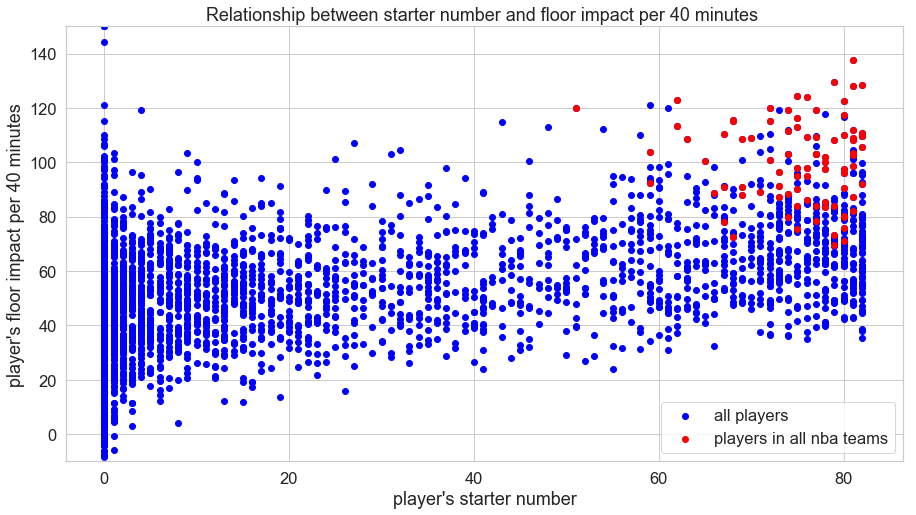

In [27]:

df = df_player[['playDispNm', 'playFIC40', 'seasYear']].groupby(["playDispNm", "seasYear"]).mean()
#display(df)

df = df.merge(player_regular_starter_bench, on=['playDispNm', 'seasYear'], how='inner')
#display(df)

df_2012 = df[df["seasYear"] == 2012]
allnba_2012 = allnba_regular_starter_bench[allnba_regular_starter_bench["seasYear"] == 2012]

#plt.scatter(df['Starter'], df['playFIC40'])
plt.figure(figsize=(15,8))
plt.ylim(-10, 150)
plt.title("Relationship between starter number and floor impact per 40 minutes ")
plt.xlabel("player's starter number")
plt.ylabel("player's floor impact per 40 minutes")



df_final = df.merge(allnba_regular_starter_bench, on=["playDispNm", "seasYear", "Bench", "Starter"])

plt.scatter(df['Starter'], df["playFIC40"], color='blue', label="all players")
plt.scatter(df_final['Starter'], df_final['playFIC40'], color='red', label="players in all nba teams")
plt.legend();


9     2012
42    2012
50    2012
57    2012
79    2012
      ... 
35    2017
39    2017
68    2017
78    2017
83    2017
Name: seasYear, Length: 84, dtype: int64